In [127]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target


# training and testing data
from sklearn.model_selection import train_test_split
#assign test data size 25%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)


#fonction pour creee des classificateur avec des different hyper parametre
def depth_variation(start_depth=3, end_depth=10):
    classifiers = []
    for i in range(start_depth, end_depth + 1):
        clf = tree.DecisionTreeClassifier(random_state=42, max_depth=i)
        classifiers.append(clf)
    return classifiers

# Utilisation de la fonction
classifiers_list = depth_variation(start_depth=3, end_depth=10)

# Maintenant, classifiers_list contient une liste de classificateurs avec des profondeurs allant de 3 à 10.



def fit_classifiers(classifiers, X, y):
    for clf in classifiers:
        clf = clf.fit(X, y)
    return classifiers

# Utilisation de la fonction avec la liste de classificateurs précédemment créée (classifiers_list)
classifiers_list_fitted = fit_classifiers(classifiers_list, X, y)

# Maintenant, classifiers_list_fitted contient une liste de classificateurs ajustés sur les données X et y.

Evaluation for classifier 0 (max_depth=3):
Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

------------------------------
Evaluation for classifier 1 (max_depth=4):
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

------------------------------
E

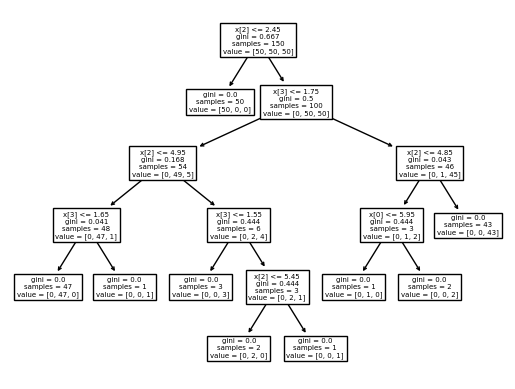

In [134]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_classifiers(classifiers, X_test, y_test):
    for idx, clf in enumerate(classifiers):
        print(f"Evaluation for classifier {idx} (max_depth={idx + 3}):")
        
        # Affichage de l'arbre de décision
        tree.plot_tree(clf)

        # Prédiction sur les données de test
        y_pred = clf.predict(X_test)

        # Calcul de l'exactitude (accuracy)
        accuracy = accuracy_score(y_pred, y_test)
        print(f"Accuracy: {accuracy}")

        # Impression du rapport de classification
        report = classification_report(y_test, y_pred)
        print("Classification Report:")
        print(report)
        print("------------------------------")

# Utilisation de la fonction avec la liste de classificateurs ajustés
evaluate_classifiers(classifiers_list_fitted, X_test, y_test)

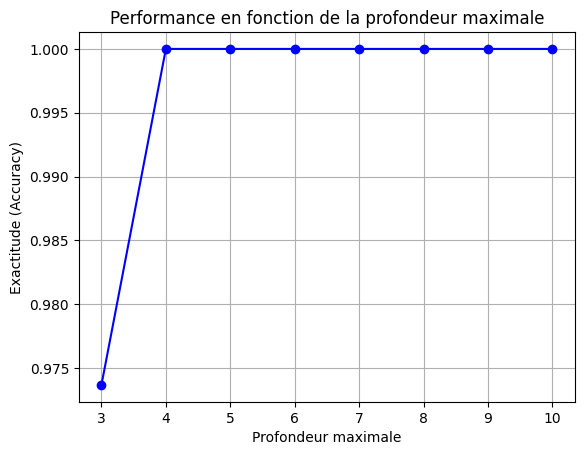

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour évaluer et collecter les performances
def evaluate_and_collect_performance(classifiers, X_test, y_test):
    accuracies = []
    for idx, clf in enumerate(classifiers):
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_pred, y_test)
        accuracies.append(accuracy)
    return accuracies

# Évaluation et collecte des performances
performances = evaluate_and_collect_performance(classifiers_list_fitted, X_test, y_test)

# Création du graphique avec Matplotlib
depths = np.arange(3, 11)
plt.plot(depths, performances, marker='o', linestyle='-', color='b')
plt.title('Performance en fonction de la profondeur maximale')
plt.xlabel('Profondeur maximale')
plt.ylabel('Exactitude (Accuracy)')
plt.xticks(depths)  # Assurez-vous que les étiquettes de l'axe x correspondent aux profondeurs
plt.grid(True)
plt.show()
